[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Question 0: Import the dataset Dataset

In [3]:
# from google.colab import drive
#drive.mount('/content/drive')

In [4]:
##### WRITE YOUR CODE HERE #####
path= 'diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [5]:
##### WRITE YOUR CODE HERE #####
data.head()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [6]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [7]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [8]:
##### WRITE YOUR CODE HERE #####
def scale(x):
  return  (x -np.mean(x))/np.std(x)  #output
#### END CODE ####

In [9]:
np.mean(data)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Question 5: Scale your features, except the target. 

In [10]:
##### WRITE YOUR CODE HERE #####
data.iloc[:,:-1] = scale(data)
#print(data)
data
#### END CODE #### 

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [11]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [12]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [13]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test =  y_test.reshape(y_test.shape[0] ,1)

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent or stochastic gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [25]:
class logistic_regression:
  def __init__(self, num_iters, threshold= 0.5, tolerance= 1e-10, lr= 0.001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters= num_iters
    self.threshold= threshold
    self.tolerance= tolerance
    self.lr= lr
    self.theta= None
    self.cost_history= []
   

  def add_ones(self, x):
    x_new = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    return x_new
 

  def sigmoid(self, x, theta):
    h = np.dot(x, theta)
    z = np.exp(-h)
    sig = 1 / (1 + z)
    return  sig


  def cross_entropy(self, x, y_true):
    y_pred = self.sigmoid(x, self.theta)
    cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return cost


  def gradient(self,x, y_true):
    y_pred = self.sigmoid(x, self.theta)
    grad = np.mean(np.dot(x.T, y_pred - y_true))
    return grad


  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x = self.add_ones(x) # Add ones to x
    y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1))     # Initialize theta to zeros vector >>> (x.shape[1])
  
    ####Descente de gradient

    for i in range(self.num_iters):
      grad = self.gradient(x, y)
      self.theta -= self.lr * grad
      cost = self.cross_entropy(x, y)
      self.cost_history.append(cost)

      if i > 0 and abs(cost - self.cost_history[-2]) < self.tolerance:
        break


  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    # Convert proba to 0 or 1. hint: list comprehension
    proba = np.where(proba >= 0.5, 1, proba)
    proba = np.where(proba < 0.5, 0, proba)
    return proba
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob = self.sigmoid(x, self.theta)  # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_history)), self.cost_history, 'r', linewidth = "2", label= 'Train Loss')
    plt.legend()
    plt.show()

  def accuracy(self,y_test, y_pred):

    return np.mean(y_test == y_pred) * 100

In [26]:
model = logistic_regression(num_iters=10000)

In [27]:
model.fit(x_train, y_train)

In [28]:
y_pred= model.predict(x_test)

In [29]:
model.accuracy(y_pred,y_test)

71.42857142857143

In [30]:
y_pred.shape

(154, 1)

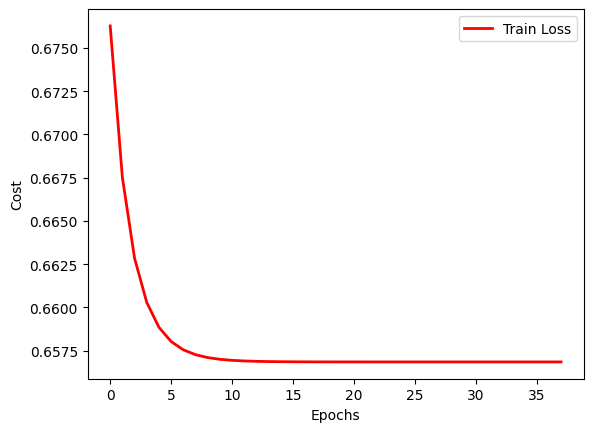

In [31]:
model.plot()

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with l1, l2 and l1+l2. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ELasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

---



---



---